# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [40]:
import pandas as pd
import numpy as np

## 1. Read in the file using pandas, and look at the first five rows

In [50]:
df = pd.read_excel('KyotoFullFlower7.xls')



## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [86]:
df = pd.read_excel('KyotoFullFlower7.xls', 
                   skiprows=25, 
                   na_values='-')

#remove spaces and capital letters from the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

df = df.rename(columns={"full-flowering_date_(doy)": "full_flowering_date_doy"})

## 3. Look at the final five rows of the data

In [63]:
#looking at the bottom
df.tail()

,ad,full-flowering_date_(doy),full-flowering_date,source_code,data_type_code,reference_name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [87]:
# na_values='-'
df

,ad,full_flowering_date_doy,full-flowering_date,source_code,data_type_code,reference_name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. What source is the most common as a reference?

In [67]:
df.reference_name.value_counts().head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: reference_name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [113]:
df[df['full_flowering_date_doy'].notnull()]

,ad,full_flowering_date_doy,full-flowering_date,source_code,data_type_code,reference_name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

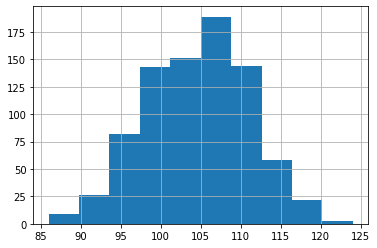

In [110]:
df.full_flowering_date_doy.hist(bins=10)

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

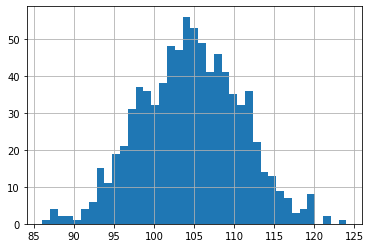

In [109]:
df.full_flowering_date_doy.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [119]:
df[df['full_flowering_date_doy'].notnull()].full_flowering_date_doy.describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: full_flowering_date_doy, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [143]:
# mean is what we need
df[df.full_flowering_date_doy.notnull()][df.ad < 1900].full_flowering_date_doy.describe()

/var/folders/dj/5c61qy0d0b9gcj0yrt1jd2300000gn/T/ipykernel_45556/992854073.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.full_flowering_date_doy.notnull()][df.ad < 1900].full_flowering_date_doy.describe()


count    714.000000
mean     105.207283
std        6.365814
min       86.000000
25%      101.000000
50%      105.000000
75%      110.000000
max      124.000000
Name: full_flowering_date_doy, dtype: float64

## 11. How about after 1900?

In [144]:
# mean is what we need
df[df.full_flowering_date_doy.notnull()][df.ad > 1900].full_flowering_date_doy.describe()

/var/folders/dj/5c61qy0d0b9gcj0yrt1jd2300000gn/T/ipykernel_45556/3466855314.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.full_flowering_date_doy.notnull()][df.ad > 1900].full_flowering_date_doy.describe()


count    112.000000
mean     100.312500
std        4.921055
min       88.000000
25%       97.000000
50%       99.000000
75%      104.000000
max      112.000000
Name: full_flowering_date_doy, dtype: float64

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [152]:
# not sure if I understood the question. aren't all the sources japanese? 
# considering sources 1 to 5 as japanese poetry, but i'm not sure
# 773 entries from a source that is a number from 1 to 5

df[df.source_code.isin([1, 2, 3, 4, 5])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 11 to 1206
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ad                       773 non-null    int64  
 1   full_flowering_date_doy  773 non-null    float64
 2   full-flowering_date      773 non-null    float64
 3   source_code              773 non-null    float64
 4   data_type_code           773 non-null    float64
 5   reference_name           771 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 42.3+ KB


## 13. Show only the years where our data was from a title in Japanese poetry

In [154]:
# not sure again, but i'm considering 'title in japanese poetry' as source_code being 1 to 5
df[df.source_code.isin([1, 2, 3, 4, 5])].ad

11       812
14       815
30       831
50       851
52       853
        ... 
1202    2003
1203    2004
1204    2005
1205    2006
1206    2007
Name: ad, Length: 773, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:xlabel='ad'>

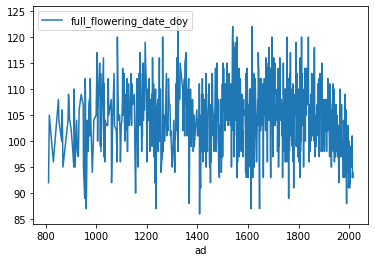

In [187]:
# showing only years and full-flowering date DOY
df_year_and_flower = df[['ad', 'full_flowering_date_doy']]

#flowering day on the x, year on the y
df_year_and_flower[df_year_and_flower.full_flowering_date_doy.notnull()].plot(kind='line',x='ad',y='full_flowering_date_doy')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

<AxesSubplot:>

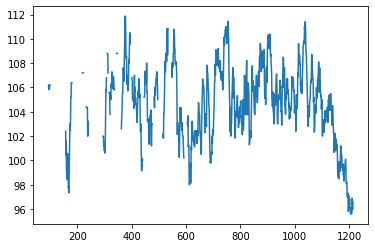

In [192]:
#graph is still weird. why does it end at 1200?

df.rolling(10, on='ad', min_periods=5)['full_flowering_date_doy'].mean().plot(kind='line',x='ad',y='full_flowering_date_doy')

<AxesSubplot:>

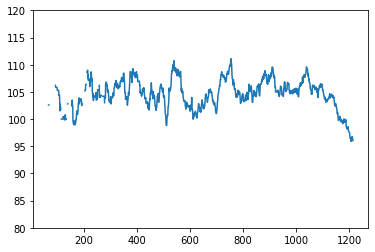

In [197]:
rolling_date = df.rolling(20, on='ad', min_periods=5)['full_flowering_date_doy'].mean()

rolling_date.plot(ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [240]:
#transform into a date and then showing the date as a wrod (april instead of 04)
df['month'] = pd.to_datetime(df['full-flowering_date'], format='%m%d').dt.strftime('%B')


#df['full-flowering_date'].dt.strftime("%m%d")

In [241]:
df

,ad,full_flowering_date_doy,full-flowering_date,source_code,data_type_code,reference_name,month
0,801,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April


### 17. Using your new column, how many blossomings happened in each month?

In [242]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

In [283]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` It might be a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [276]:
df['day_of_month'] = pd.to_datetime(df['full-flowering_date'], format='%m%d').dt.day

In [277]:
df

,ad,full_flowering_date_doy,full-flowering_date,source_code,data_type_code,reference_name,month,day_of_month
0,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,9.0
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,10.0
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,3.0
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,4.0


### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above.

In [279]:
df['date'] = pd.to_datetime(df['full-flowering_date'], format='%m%d')

In [280]:
df

,ad,full_flowering_date_doy,full-flowering_date,source_code,data_type_code,reference_name,month,day_of_month,date
0,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,9.0,1900-04-09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,10.0,1900-04-10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,3.0,1900-04-03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,4.0,1900-04-04


# YOU ARE DONE.

And **incredible.**